# THESE CONTENTS SHOULD BE CONTAINED IN YOUR REPORT !!

Please write your report for Q4_CNN contains below contents.

- 2.1.2. Discussion on `modified_cnn_1`.
- 2.2.2. Discussion on `modified_cnn_2`.
- 2.3.2. Discussion on `modified_cnn_3`.
- 3.2. Analyze your `my_cnn`.


#Q4: Classification Task on the CIFAR-10 Dataset with CNN
## Objective:
Implement Convolutional Neural Networks (CNNs) to classify images from the CIFAR-10 dataset.

## Dataset:
CIFAR-10 is a widely-used dataset for object recognition. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

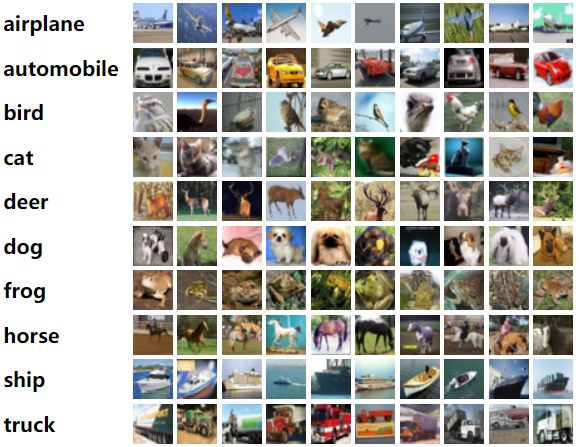

## 0. Reference codes for the task


The codes provided in this section are the functionality (load and pre-process data, and plot data) needed to accomplish this assignment.


### IMPORTANT!! PLEASE FOLLOW THIS BEFORE YOU START

You should put the `utils.py` file in the same directory with the `Q4_CNN.ipynb`.\
If you don't, you'll get an error during import and won't be able to use the utility functions provided.


### 0-1. Prepare the packages required

Import packages that you need for the task. You can add any additional packages you need for your work here.

In [8]:
import math
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# for data processing
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# for model definition & training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# import utility functions
from utils import *

### 0-2. Data Loading and Preprocessing:
Load the CIFAR-10 dataset.
Preprocess the data by normalizing pixel values and performing any other necessary preprocessing steps.

In [9]:
# Load CIFAR-10 dataset
(x_trainval, y_trainval), (x_test, y_test) = cifar10.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1 by dividing by 255.0
# One-hot encode the labels
x_trainval = x_trainval.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_trainval = to_categorical(y_trainval, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Divide trainval into train and val set
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size = 0.1, random_state = 42)

# Print dataset shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", x_val.shape)
print("Validation labels shape:", y_val.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (45000, 32, 32, 3)
Training labels shape: (45000, 10)
Validation data shape: (5000, 32, 32, 3)
Validation labels shape: (5000, 10)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 10)


### 0-3. Plot some sample data in your training dataset.

Plot the samples of the training set using `plot_data_sample` from utils.py.

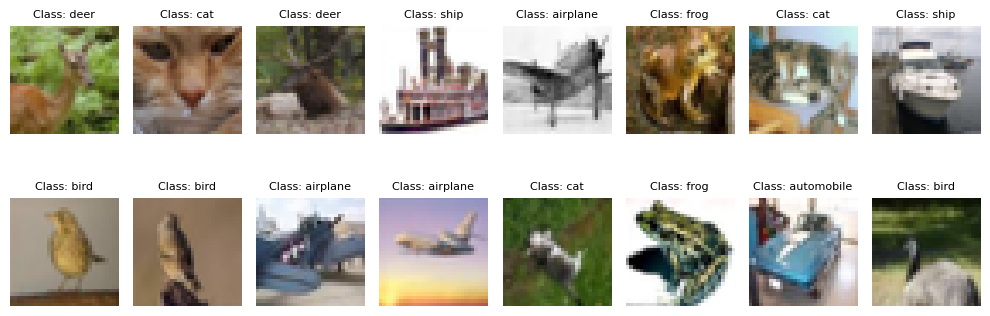

In [10]:
plot_data_sample((x_train, y_train), 16)

## 1. The base CNN model (25)
### 1.1. Define the base CNN model (10)
Design a CNN architecture suitable for image classification.\
We provide a summary information (Layer and output shapes) of the base model.\
Define the `base_cnn` so that it matches the given summary information.\

Please note that you **SHOULD** define the `base_cnn` using `tensorflow.keras.models.Sequential`. Defining the model with `class` is **NOT** allowed in problem 1.

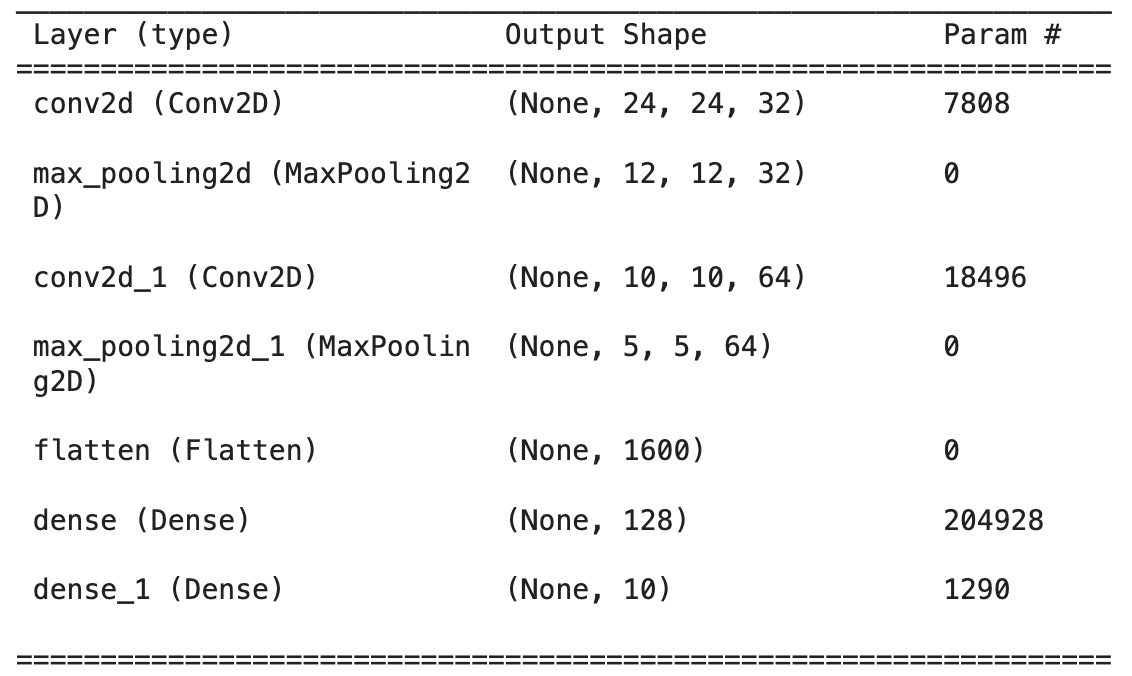

In [11]:
input_shape = (32, 32, 3)

base_cnn = Sequential([
    ##########################
    ## Write your code here ##
    ##########################
    Conv2D(32, kernel_size=(9, 9), activation='relu', input_shape=input_shape, name='conv2d'),
    MaxPooling2D(pool_size=(2, 2), name='max_pooling2d'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv2d_1'),
    MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_1'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='dense'),
    Dense(10, activation='softmax', name='dense_1')
    ##########################
])

base_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        7808      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

### 1.2. Training the base model (10)

Define a train function that takes a model, a save path, a train dataset, and a validation dataset, trains the model, and stores the model_weight. \
The train function should follow the given hyperparameters:
 - batch size: 64
 - number of epochs: 50
 - adam optimizer with learning rate 0.001
 - save the best model only

In [12]:
def train(model, checkpoint_save_path, train_dataset, val_dataset):
    # divide dataset into x and y
    x_train, y_train = train_dataset
    x_val, y_val = val_dataset

    ##########################
    ## Write your code here ##
    ##########################

    # Define training hyperparameters
    batch_size = 64
    epochs = 50
    learning_rate = 0.001

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    # Define a callback to save the best model
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_save_path,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1)

    # Train the model
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_val, y_val),
                        callbacks=[checkpoint_callback])

    ##########################

    return history

Train the `base_cnn` using your `train` function.\
The save path of the model weight is './base_cnn.h5'.

In [13]:
base_history = train(base_cnn, './base_cnn.h5', (x_train, y_train), (x_val, y_val))

Epoch 1/50
704/704 [==============================] - ETA: 0s - loss: 1.6672 - accuracy: 0.3970
Epoch 1: val_loss improved from inf to 1.47670, saving model to ./base_cnn.h5
704/704 [==============================] - 5s 5ms/step - loss: 1.6672 - accuracy: 0.3970 - val_loss: 1.4767 - val_accuracy: 0.4708
Epoch 2/50
699/704 [============================>.] - ETA: 0s - loss: 1.3761 - accuracy: 0.5079
Epoch 2: val_loss improved from 1.47670 to 1.33337, saving model to ./base_cnn.h5
704/704 [==============================] - 4s 5ms/step - loss: 1.3750 - accuracy: 0.5081 - val_loss: 1.3334 - val_accuracy: 0.5168
Epoch 3/50
693/704 [============================>.] - ETA: 0s - loss: 1.2405 - accuracy: 0.5605
Epoch 3: val_loss improved from 1.33337 to 1.28183, saving model to ./base_cnn.h5
704/704 [==============================] - 3s 5ms/step - loss: 1.2407 - accuracy: 0.5603 - val_loss: 1.2818 - val_accuracy: 0.5426
Epoch 4/50
703/704 [============================>.] - ETA: 0s - loss: 1.1433 

plot the train and validation loss graph using `plot_loss_and_accuracy` function from utils.py.

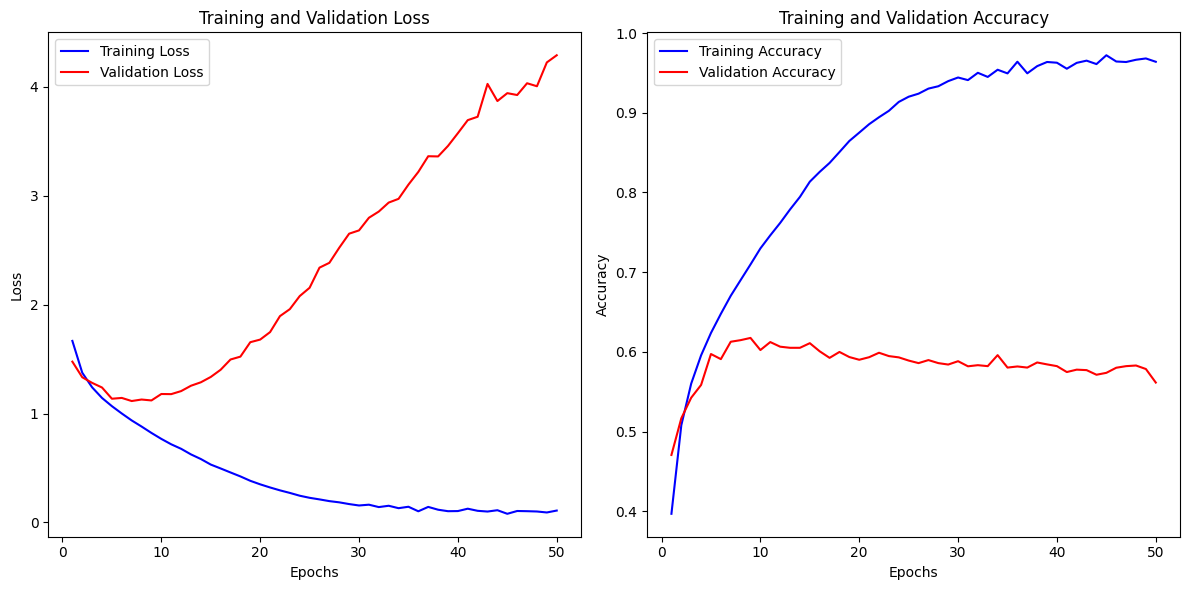

In [14]:
plot_loss_and_accuracy(base_history)

### 1.3. Evaluation & Plot the results (5):
Print out the loss and accuracy of the trained model on the test set.\
If your results fall far short of the baseline (i.e. lower than 50% in accuracy), you will get a 0 score here.

In [15]:
# Evaluate the base_cnn on the test set
test_loss, test_accuracy = base_cnn.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 4.2698 - accuracy: 0.5708
Test Loss: 4.269802570343018
Test Accuracy: 0.5708000063896179


Plot the results by using `plot_results` function from utils.py.

1/1 [==============================] - 0s 177ms/step


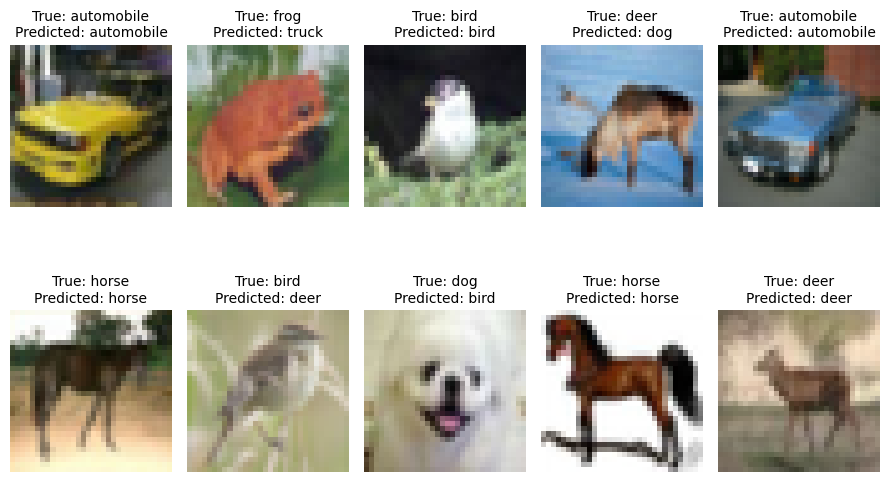

In [16]:
plot_results(base_cnn, (x_test, y_test))

## 2. Design the additional CNN models (45)

Please note that you **SHOULD** define the modifed_cnns in problem 2 using `tensorflow.keras.models.Sequential`. Defining the model with `class` is **NOT** allowed in problem 2.

### 2.1. `modified_cnn_1` (15)

#### 2.1.1. Model definition, training and evaluation (5)

##### Model definition

Design a CNN architecture suitable for image classification.\
We provide a summary information (Layer and output shapes) of the base model.\
Define the `modified_cnn_1` so that it matches the given summary information.

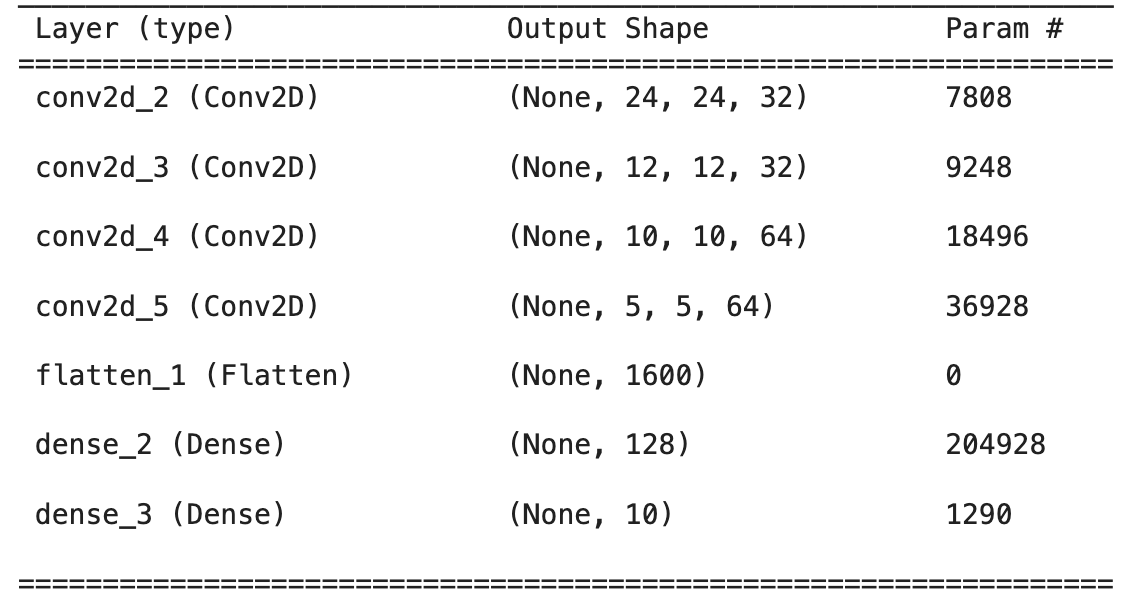

In [17]:
modified_cnn_1 = Sequential([
    ##########################
    ## write your code here ##
    ##########################
    Conv2D(32, kernel_size=(9, 9), activation='relu', input_shape=input_shape, name='conv2d_2'),
    Conv2D(32, kernel_size=(13, 13), activation='relu', name='conv2d_3'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv2d_4'),
    Conv2D(64, kernel_size=(6, 6), activation='relu', name='conv2d_5'),
    Flatten(name='flatten_1'),
    Dense(128, activation='relu', name='dense_2'),
    Dense(10, activation='softmax', name='dense_3')
    ##########################
])

modified_cnn_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        7808      
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        173088    
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 64)          147520    
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               204928    
                                                                 
 dense_3 (Dense)             (None, 10)               

##### Train the model

Train the `modified_cnn_1` with the train function that you define in the section 1. Save the model as named 'modified_cnn_1.h5'.

In [18]:
modified_history_1 = train(modified_cnn_1, 'modified_cnn_1.h5', (x_train, y_train), (x_val, y_val))

Epoch 1/50
704/704 [==============================] - ETA: 0s - loss: 1.9022 - accuracy: 0.2776
Epoch 1: val_loss improved from inf to 1.79486, saving model to modified_cnn_1.h5
704/704 [==============================] - 8s 7ms/step - loss: 1.9022 - accuracy: 0.2776 - val_loss: 1.7949 - val_accuracy: 0.3270
Epoch 2/50
700/704 [============================>.] - ETA: 0s - loss: 1.6808 - accuracy: 0.3736
Epoch 2: val_loss improved from 1.79486 to 1.62515, saving model to modified_cnn_1.h5
704/704 [==============================] - 4s 6ms/step - loss: 1.6810 - accuracy: 0.3735 - val_loss: 1.6252 - val_accuracy: 0.3876
Epoch 3/50
700/704 [============================>.] - ETA: 0s - loss: 1.5989 - accuracy: 0.4091
Epoch 3: val_loss improved from 1.62515 to 1.60862, saving model to modified_cnn_1.h5
704/704 [==============================] - 5s 8ms/step - loss: 1.5983 - accuracy: 0.4092 - val_loss: 1.6086 - val_accuracy: 0.4058
Epoch 4/50
700/704 [============================>.] - ETA: 0s - l

Plot the loss and accuracy graph of `modified_cnn_1`.

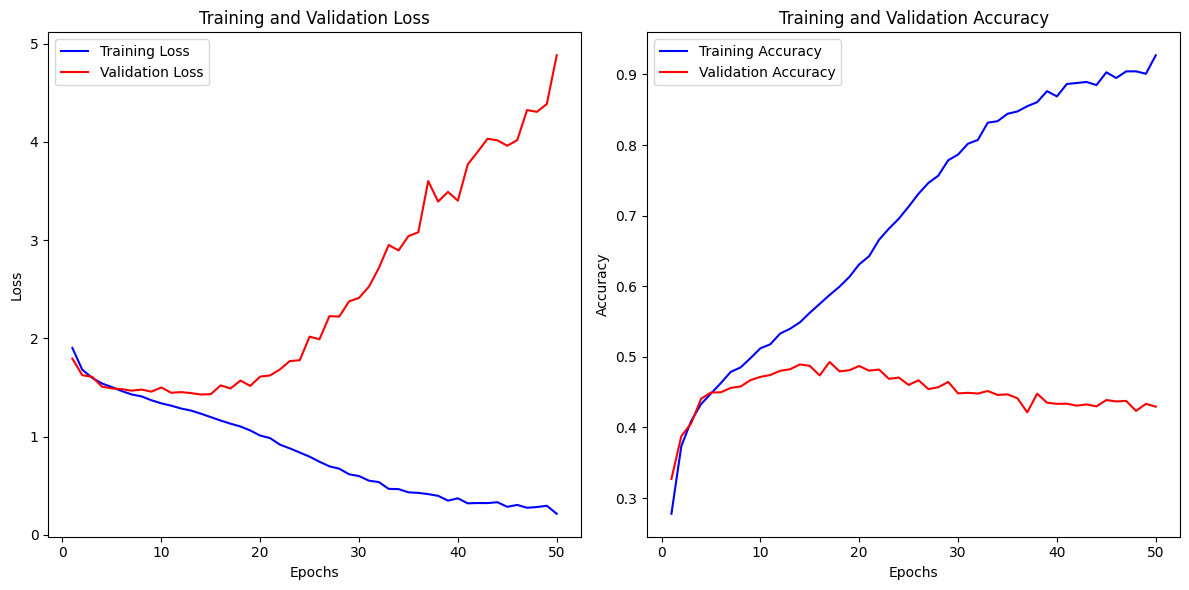

In [19]:
plot_loss_and_accuracy(modified_history_1)

##### Evaluate the model.

Print out the loss and accuracy of the trained model on the test set.

In [20]:
# Evaluate the modified_cnn_1 on the test set
test_loss, test_accuracy = modified_cnn_1.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 4.9931 - accuracy: 0.4332
Test Loss: 4.993117332458496
Test Accuracy: 0.43320000171661377


#### 2.1.2. Discussion on `modified_cnn_1`. (10)

**THIS CONTENT SHOULD BE IN YOUR REPORTS!!**

Please write the differences between `base_cnn` and `modified_cnn_1` in your report. Describe why the difference in structure between the two affects the accuracy of the classification.

### 2.2. `modified_cnn_2` (15)

#### 2.2.1. Model definition, training and evaluation (5)

##### Model definition

Design a CNN architecture suitable for image classification.\
We provide a summary information (Layer and output shapes) of the base model.\
Define the `modified_cnn_2` so that it matches the given summary information.

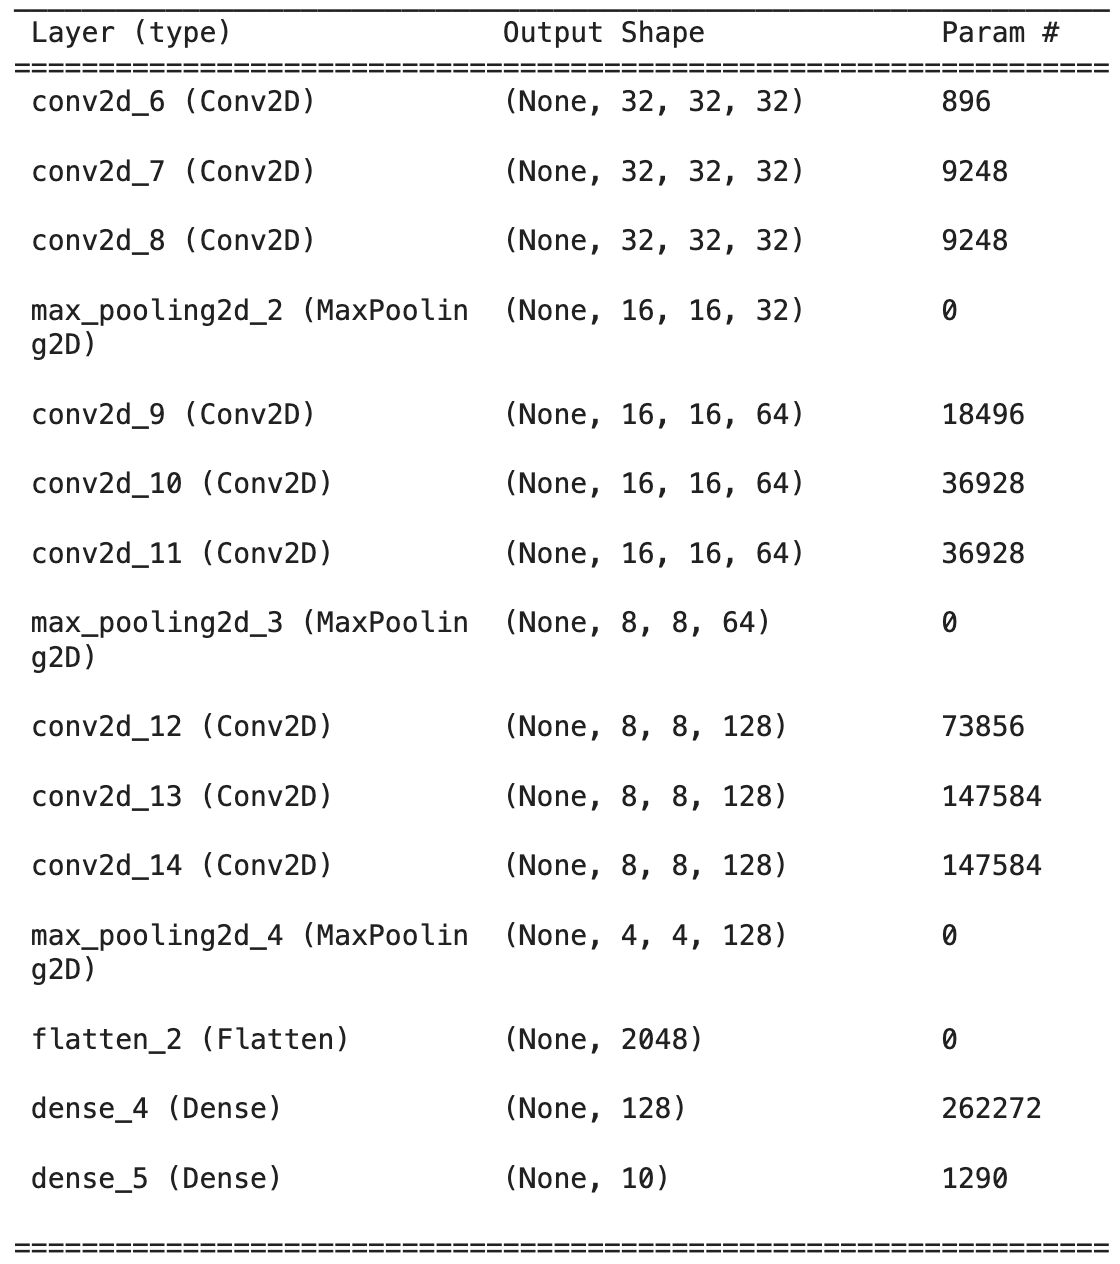

In [21]:
modified_cnn_2 = Sequential([
    ##########################
    ## write your code here ##
    ##########################
    Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape=input_shape, name='conv2d_6'),
    Conv2D(32, kernel_size=(1, 1), activation='relu', name='conv2d_7'),
    Conv2D(32, kernel_size=(1, 1), activation='relu', name='conv2d_8'),
    MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_2'),
    Conv2D(64, kernel_size=(1, 1), activation='relu', name='conv2d_9'),
    Conv2D(64, kernel_size=(1, 1), activation='relu', name='conv2d_10'),
    Conv2D(64, kernel_size=(1, 1), activation='relu', name='conv2d_11'),
    MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_3'),
    Conv2D(128, kernel_size=(1, 1), activation='relu', name='conv2d_12'),
    Conv2D(128, kernel_size=(1, 1), activation='relu', name='conv2d_13'),
    Conv2D(128, kernel_size=(1, 1), activation='relu', name='conv2d_14'),
    MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_4'),
    Flatten(name='flatten_2'),
    Dense(128, activation='relu', name='dense_4'),
    Dense(10, activation='softmax', name='dense_5')
    ##########################
])

modified_cnn_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        128       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        1056      
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        1056      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        2112      
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        4160      
                                                      

##### Train the model

Train the `modified_cnn_2` with the train function that you define in the section 1. Save the model as named 'modified_cnn_2.h5'.

In [22]:
modified_history_2 = train(modified_cnn_2, 'modified_cnn_2.h5', (x_train, y_train), (x_val, y_val))

Epoch 1/50
704/704 [==============================] - ETA: 0s - loss: 1.7523 - accuracy: 0.3629
Epoch 1: val_loss improved from inf to 1.55978, saving model to modified_cnn_2.h5
704/704 [==============================] - 10s 9ms/step - loss: 1.7523 - accuracy: 0.3629 - val_loss: 1.5598 - val_accuracy: 0.4374
Epoch 2/50
703/704 [============================>.] - ETA: 0s - loss: 1.4860 - accuracy: 0.4645
Epoch 2: val_loss improved from 1.55978 to 1.48009, saving model to modified_cnn_2.h5
704/704 [==============================] - 5s 7ms/step - loss: 1.4859 - accuracy: 0.4645 - val_loss: 1.4801 - val_accuracy: 0.4658
Epoch 3/50
704/704 [==============================] - ETA: 0s - loss: 1.3868 - accuracy: 0.5018
Epoch 3: val_loss improved from 1.48009 to 1.35811, saving model to modified_cnn_2.h5
704/704 [==============================] - 6s 8ms/step - loss: 1.3868 - accuracy: 0.5018 - val_loss: 1.3581 - val_accuracy: 0.5142
Epoch 4/50
700/704 [============================>.] - ETA: 0s - 

Plot the loss and accuracy graph of `modified_cnn_2`.

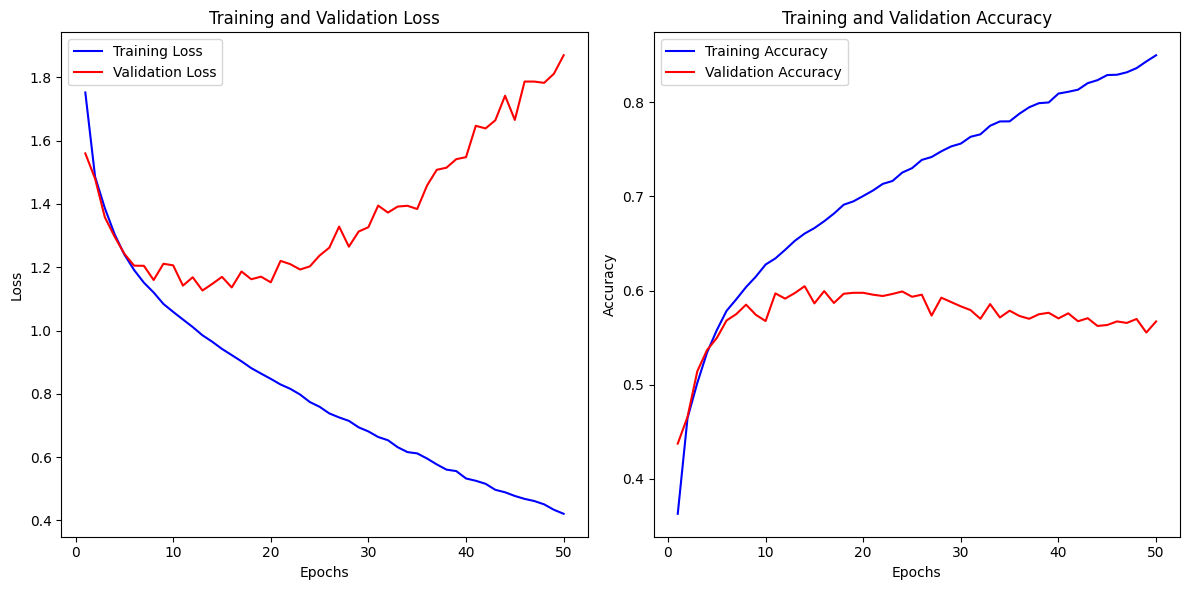

In [23]:
plot_loss_and_accuracy(modified_history_2)

##### Evaluate the model.

Print out the loss and accuracy of the trained model on the test set.

In [24]:
# Evaluate the modified_cnn_2 on the test set
test_loss, test_accuracy = modified_cnn_2.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.9178 - accuracy: 0.5711
Test Loss: 1.91777503490448
Test Accuracy: 0.5710999965667725


#### 2.2.2. Discussion on `modified_cnn_2`. (10)

**THIS CONTENT SHOULD BE IN YOUR REPORTS!!**

Please write the differences between `base_cnn` and `modified_cnn_2` in your report. Describe why the difference in structure between the two affects the accuracy of the classification.

### 2.3. `modified_cnn_3` (15)

#### 2.3.1. Model definition, training and evaluation (5)

##### Model definition

Design a CNN architecture suitable for image classification.\
We provide a summary information (Layer and output shapes) of the base model.\
Define the `modified_cnn_3` so that it matches the given summary information.

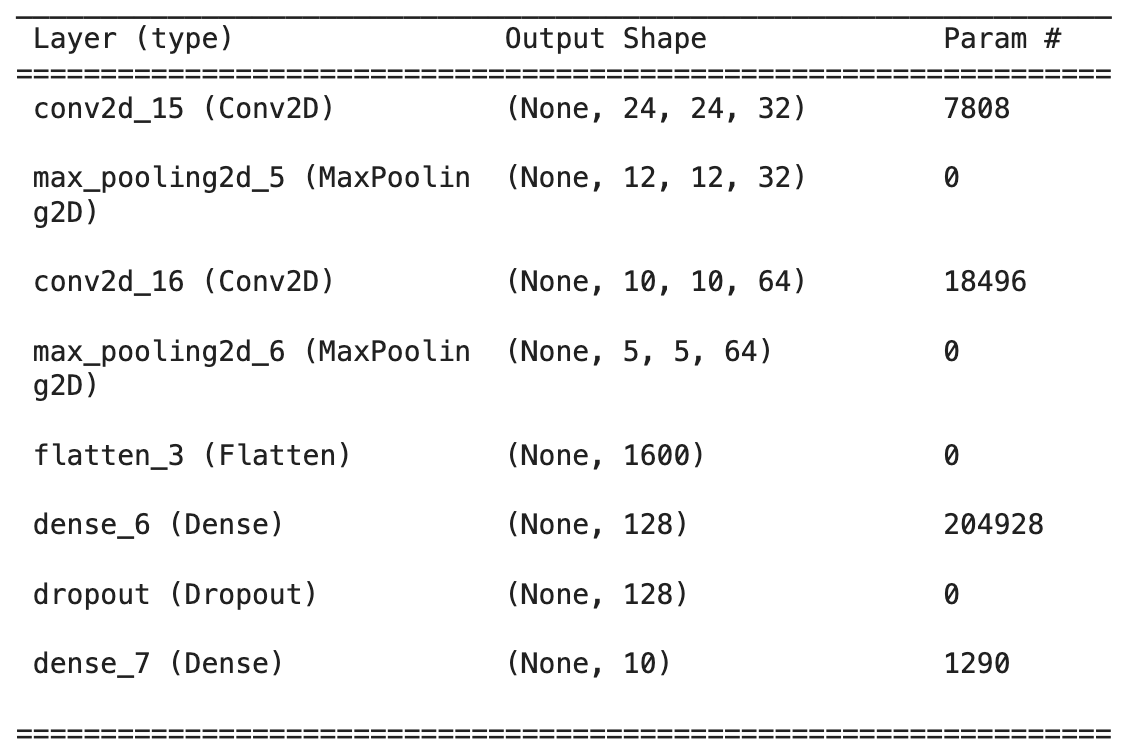

In [25]:
modified_cnn_3 = Sequential([
    ##########################
    ## write your code here ##
    ##########################
    Conv2D(32, kernel_size=(9, 9), activation='relu', input_shape=input_shape, name='conv2d_15'),
    MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_5'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv2d_16'),
    MaxPooling2D(pool_size=(2, 2), name='max_pooling2d_6'),
    Flatten(name='flatten_3'),
    Dense(128, activation='relu', name='dense_6'),
    Dropout(0.5, name='dropout'),
    Dense(10, activation='softmax', name='dense_7')
    ##########################
])

modified_cnn_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        7808      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

##### Train the model

Train the `modified_cnn_3` with the train function that you define in the section 1. Save the model as named 'modified_cnn_3.h5'.

In [26]:
modified_history_3 = train(modified_cnn_3, 'modified_cnn_3.h5', (x_train, y_train), (x_val, y_val))

Epoch 1/50
704/704 [==============================] - ETA: 0s - loss: 1.8192 - accuracy: 0.3334
Epoch 1: val_loss improved from inf to 1.55194, saving model to modified_cnn_3.h5
704/704 [==============================] - 5s 5ms/step - loss: 1.8192 - accuracy: 0.3334 - val_loss: 1.5519 - val_accuracy: 0.4466
Epoch 2/50
696/704 [============================>.] - ETA: 0s - loss: 1.5480 - accuracy: 0.4384
Epoch 2: val_loss improved from 1.55194 to 1.40335, saving model to modified_cnn_3.h5
704/704 [==============================] - 3s 5ms/step - loss: 1.5474 - accuracy: 0.4384 - val_loss: 1.4034 - val_accuracy: 0.4840
Epoch 3/50
703/704 [============================>.] - ETA: 0s - loss: 1.4368 - accuracy: 0.4844
Epoch 3: val_loss improved from 1.40335 to 1.36956, saving model to modified_cnn_3.h5
704/704 [==============================] - 3s 4ms/step - loss: 1.4369 - accuracy: 0.4844 - val_loss: 1.3696 - val_accuracy: 0.5014
Epoch 4/50
703/704 [============================>.] - ETA: 0s - l

Plot the loss and accuracy graph of `modified_cnn_3`.

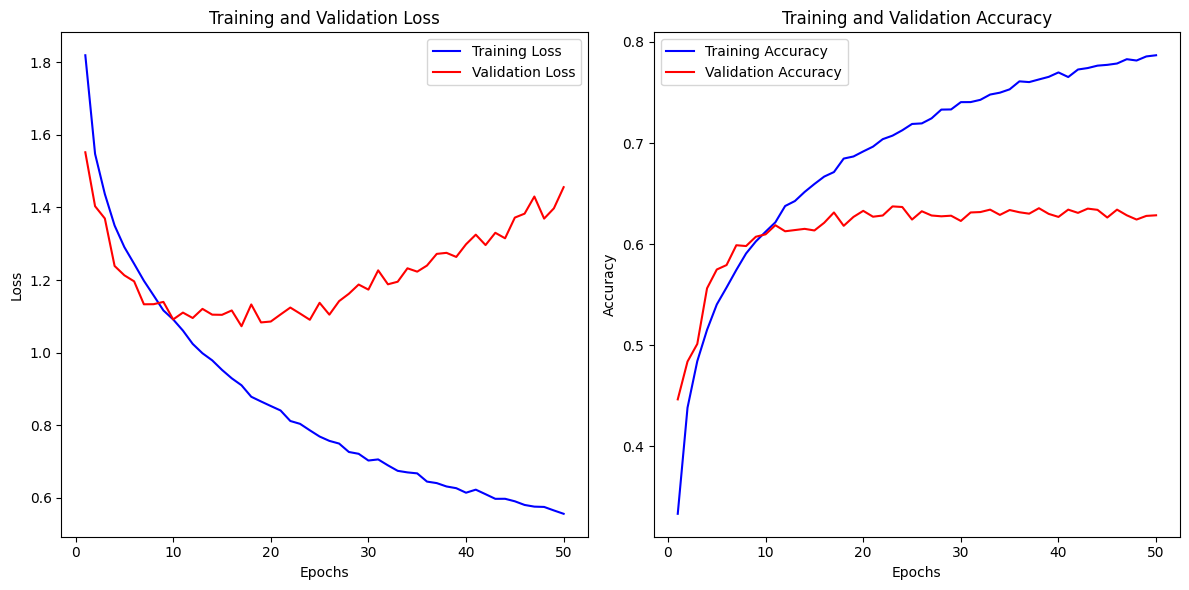

In [27]:
plot_loss_and_accuracy(modified_history_3)

##### Evaluate the model.

Print out the loss and accuracy of the trained model on the test set.

In [28]:
# Evaluate the modified_cnn_3 on the test set
test_loss, test_accuracy = modified_cnn_3.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 1.4908 - accuracy: 0.6284
Test Loss: 1.490835428237915
Test Accuracy: 0.6284000277519226


#### 2.3.2. Discussion on `modified_cnn_3`. (10)

**THIS CONTENT SHOULD BE IN YOUR REPORTS!!**

Please write the differences between `base_cnn` and `modified_cnn_3` in your report. Describe why the difference in structure between the two affects the accuracy of the classification.

## 3. Design your own CNN model (30)

### 3.1. Implement model definition, train, and evaluation (15)

Develop your own CNN model `my_cnn` to show higher accuracy on the test set.

- Use the train function implemented in 1 (use the same train hyperparameters).
- Do **NOT** use predefined or pre-trained models in TensorFlow.
- Do **NOT** use models with non-CNN structures (e.g. transformers, etc.).
- Do **NOT** use test data while training the model.
- You can add additional layers from `tensorflow.keras.layers` if you need.
- You can define your model either `Sequential(...)` format or `class` format.
- If you violate the second, third, or fourth rule, you will get 0 in this problem.

Scoring is based on the accuracy on the test set.

- 70% or less: 0 points
- 70-80%: (accuracy - 70) * (15 / 10) points
- 80% or higher: 15 points (max)

For example, 63%: 0 points, 71%: 1.5 point, 76%: 9 points, 92%: 15 points.


##### Define the model

In [50]:
input_shape = (32, 32, 3)

##########################
## write your code here ##
##########################

my_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape), # best
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
##########################

my_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_15 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_16 (Ba  (None, 13, 13, 64)       

##### Train the model

In [51]:
my_history = train(my_cnn, 'my_cnn.h5', (x_train, y_train), (x_val, y_val))

Epoch 1/50
700/704 [============================>.] - ETA: 0s - loss: 1.7142 - accuracy: 0.3841
Epoch 1: val_loss improved from inf to 1.65988, saving model to my_cnn.h5
704/704 [==============================] - 8s 8ms/step - loss: 1.7128 - accuracy: 0.3845 - val_loss: 1.6599 - val_accuracy: 0.4414
Epoch 2/50
697/704 [============================>.] - ETA: 0s - loss: 1.3829 - accuracy: 0.5026
Epoch 2: val_loss improved from 1.65988 to 1.25136, saving model to my_cnn.h5
704/704 [==============================] - 5s 7ms/step - loss: 1.3826 - accuracy: 0.5030 - val_loss: 1.2514 - val_accuracy: 0.5526
Epoch 3/50
702/704 [============================>.] - ETA: 0s - loss: 1.2388 - accuracy: 0.5611
Epoch 3: val_loss improved from 1.25136 to 1.15399, saving model to my_cnn.h5
704/704 [==============================] - 5s 7ms/step - loss: 1.2392 - accuracy: 0.5609 - val_loss: 1.1540 - val_accuracy: 0.5850
Epoch 4/50
699/704 [============================>.] - ETA: 0s - loss: 1.1560 - accuracy: 

##### Plot the loss and accuracy

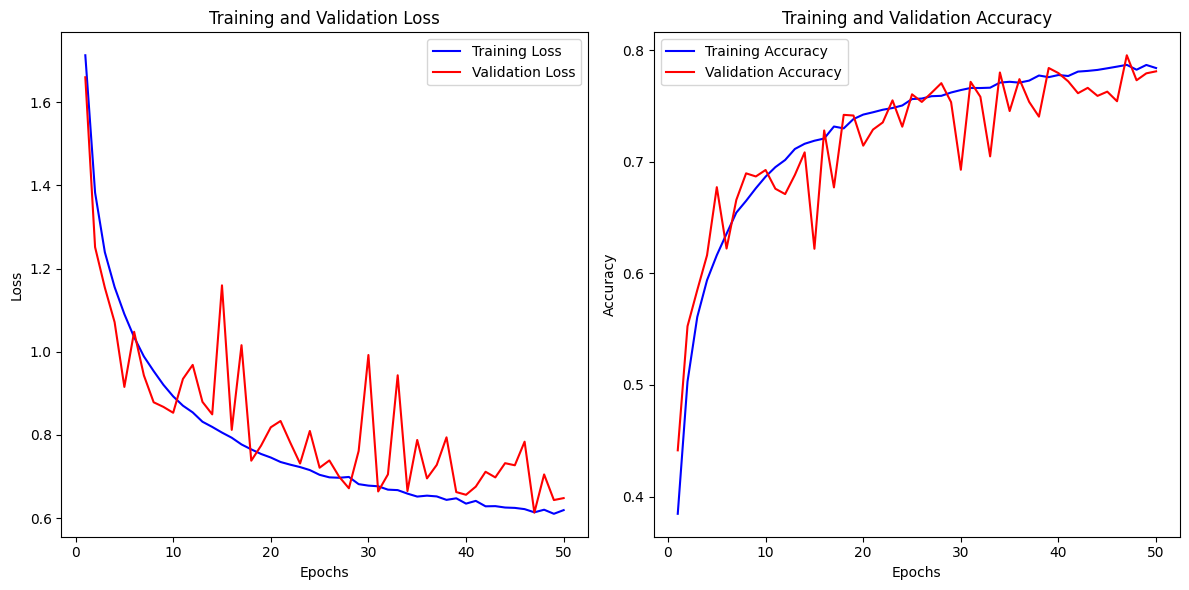

In [52]:
plot_loss_and_accuracy(my_history)

##### Evaluate the accuracy of the model

In [53]:
# Evaluate the my_cnn on the test set
test_loss, test_accuracy = my_cnn.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.6759 - accuracy: 0.7671
Test Loss: 0.6759142875671387
Test Accuracy: 0.7670999765396118


### 3.2. Analyze your `my_cnn`. (15)

**THIS CONTENT SHOULD BE IN YOUR REPORTS!!**

Describe what you tried in implementing `my_cnn`, how it differs from `base_cnn`, how those factors affected your model's performance, and your thoughts on why in your report.\
If you do an ablation study or provide a clear rationale for the design of your model, you can earn up to 10 bonus points.


## Submission
In additional to this ipython notebook, please make a `Q4_models.zip` file which contains below files:
- base_cnn.h5
- modified_cnn_1.h5
- modified_cnn_2.h5
- modified_cnn_3.h5
- my_cnn.h5

If you don't follow the submission form properly, there will be a 10% penalty.